### Esercitazione 3 - Analisi distribuzione livelli di prezzo
#### Argomenti

* recupero serie storiche da un provider dati
* analisi statistica
* analisi distribuzione dei livelli di prezzo
* creazione di un grafico custom per evidenziare i livelli di prezzo con più scambi

In [1]:
from Historic_Crypto import HistoricalData
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

candles = HistoricalData(
    ticker='BTC-USD',
    granularity=3600,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

Provisional Start: 2022-09-13T11:20:00
Provisional End: 2022-09-25T23:20:00
Provisional Start: 2022-09-25T23:20:00
Provisional End: 2022-10-08T11:20:00
Provisional Start: 2022-10-08T11:20:00
Provisional End: 2022-10-20T23:20:00


In [3]:
candles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
low,718.0,19385.479903,474.602077,18153.130000,19042.562500,19318.055000,19749.72250,21318.500000
high,718.0,19548.145641,485.012181,18474.300000,19174.295000,19476.210000,19913.27000,22800.000000
open,718.0,19472.175933,484.094183,18389.430000,19110.335000,19403.830000,19851.56750,22528.950000
close,718.0,19467.401100,470.693337,18390.510000,19109.627500,19402.775000,19842.28250,21402.790000
volume,718.0,1170.463496,899.899128,129.622532,565.910353,941.786393,1564.19879,10486.330822


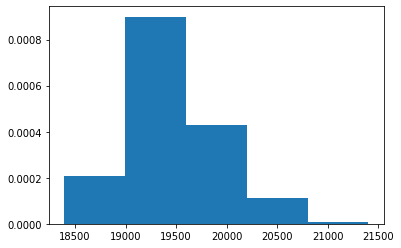

In [4]:
plt.hist(candles.close, density=True, bins=5)
plt.show()

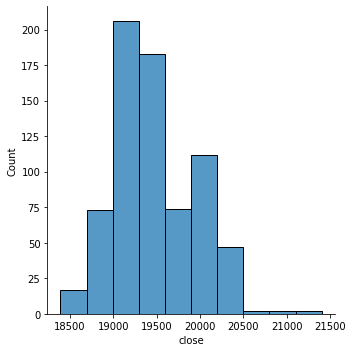

In [5]:
sns.displot(candles.close, bins=10)
plt.show()

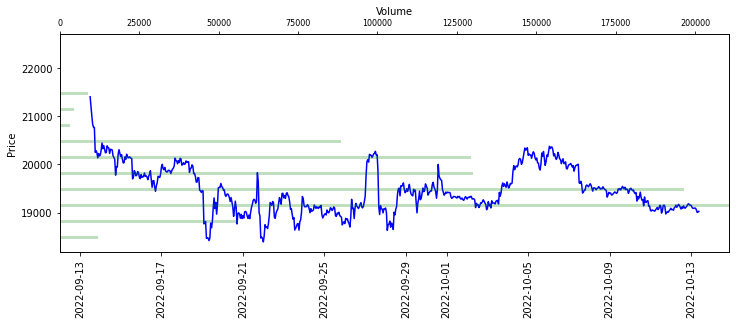

In [6]:
y_max = candles.high.max()
y_min = candles.low.min()
steps = int(len(candles) / 50)
price_step = (y_max - y_min) / steps
price_intervals = candles.groupby(pd.cut(candles['close'], np.arange(y_min, y_max, price_step))).sum()
price_intervals_labels = [p.right for p in price_intervals.index.values]
price_intervals_volume_values = price_intervals.volume.values
max_price_intervals_volume_value = np.max(price_intervals_volume_values)

plt.figure(figsize=(12, 4))
plt.plot(candles.close, color='blue', label='close price')
plt.xticks(rotation=90)
plt.ylabel('Price')
ax1b = plt.twiny()
ax1b.barh(price_intervals_labels, price_intervals_volume_values, height=50, alpha=0.25, color='green')
ax1b.axis(xmin=0, xmax=max_price_intervals_volume_value)
ax1b.set_xlabel('Volume')
ax1b.tick_params(axis="x", labelsize=8)
ax1b.tick_params(axis="y", labelsize=8)
plt.show()